In [2]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lz=WordNetLemmatizer()
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam

In [5]:
voc_size=10000

In [6]:
news_df=pd.read_csv('/content/drive/MyDrive/processed.csv')

In [44]:
import seaborn as sns

In [7]:
X=news_df['content']
y=news_df['label']

In [49]:
X.head()

0    istanbul explosion isi bomber kill least istan...
1    trump give remark healthcare pm gmt white hous...
2    mi school sends welcome back packet warning ki...
3    spacex bfr go city city earth hour spacex bfr ...
4    republican lack agreement obamacare ahead trum...
Name: content, dtype: object

In [8]:
type(X)

pandas.core.series.Series

In [9]:
print(X)

0        istanbul explosion isi bomber kill least istan...
1        trump give remark healthcare pm gmt white hous...
2        mi school sends welcome back packet warning ki...
3        spacex bfr go city city earth hour spacex bfr ...
4        republican lack agreement obamacare ahead trum...
                               ...                        
55216    spain make largest cocaine bust year madrid re...
55217    breaking youre fired fbi director james comey ...
55218    wartorn darfur new u aid chief stress need hum...
55219    climate doubter pruitt take epa rein trump tar...
55220    need safe place pumpkin internet drag trump be...
Name: content, Length: 55221, dtype: object


In [10]:
len(X[0])

3657

In [11]:
corpus=[]
for i in range(0,len(X)):
  review=X[i]
  review=review.split()
  review=' '.join(review)
  corpus.append(review)


In [13]:
onehot_repr=[one_hot(words,voc_size) for words in corpus]   #here voc_size denotes the number of columns


In [15]:
print(len(onehot_repr[0]))

510


In [16]:
 sent_length=1500
 embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
 #print(embedded_docs)
 from keras.layers import Dropout

In [17]:
embedding_vector_features=64
model=Sequential()  #sequential model
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length,trainable=False))
#model.add(Dropout(0.7))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))  #1 represents node which is simply a output node and since we are working on binary classification problem so sigmoid  #in model summary the dense parameter is 201 which says it has 201 biases
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 64)          640000    
                                                                 
 bidirectional (Bidirection  (None, 200)               132000    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 772201 (2.95 MB)
Trainable params: 132201 (516.41 KB)
Non-trainable params: 640000 (2.44 MB)
_________________________________________________________________
None


In [18]:
embedding_vector_features=64
model1=Sequential()  #sequential model
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#model.add(Dropout(0.7))
model1.add(LSTM(140))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))  #1 represents node which is simply a output node and since we are working on binary classification problem so sigmoid  #in model summary the dense parameter is 201 which says it has 201 biases
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1500, 64)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 140)               114800    
                                                                 
 dropout_1 (Dropout)         (None, 140)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 141       
                                                                 
Total params: 754941 (2.88 MB)
Trainable params: 754941 (2.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.2,random_state=42)


In [23]:
history1=model1.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=64)


Epoch 1/10
622/622 [==============================] - 127s 201ms/step - loss: 0.4406 - accuracy: 0.8310 - val_loss: 0.2293 - val_accuracy: 0.9153
Epoch 2/10
622/622 [==============================] - 84s 136ms/step - loss: 0.1693 - accuracy: 0.9399 - val_loss: 0.1421 - val_accuracy: 0.9511
Epoch 3/10
622/622 [==============================] - 68s 110ms/step - loss: 0.1199 - accuracy: 0.9615 - val_loss: 0.1390 - val_accuracy: 0.9572
Epoch 4/10
622/622 [==============================] - 60s 96ms/step - loss: 0.0888 - accuracy: 0.9724 - val_loss: 0.1143 - val_accuracy: 0.9617
Epoch 5/10
622/622 [==============================] - 53s 85ms/step - loss: 0.1334 - accuracy: 0.9563 - val_loss: 0.1207 - val_accuracy: 0.9581
Epoch 6/10
622/622 [==============================] - 49s 80ms/step - loss: 0.0628 - accuracy: 0.9814 - val_loss: 0.1054 - val_accuracy: 0.9651
Epoch 7/10
622/622 [==============================] - 50s 80ms/step - loss: 0.0555 - accuracy: 0.9839 - val_loss: 0.1101 - val_accur

In [28]:
model1.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


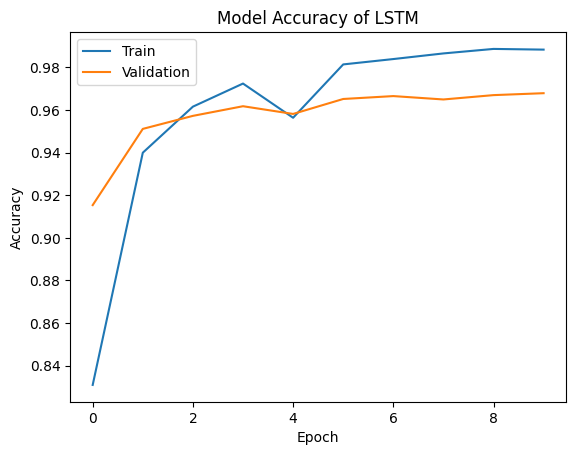

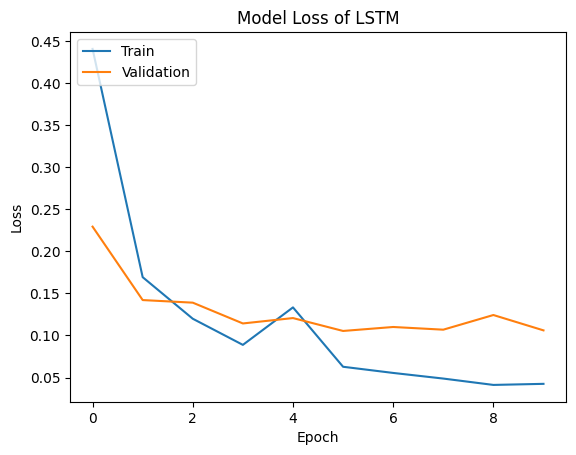

In [40]:
# Plot accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy of LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss of LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
y_pred = (model1.predict(X_test)>=0.5).astype(int)

346/346 [==============================] - 8s 19ms/step


In [32]:
from sklearn.metrics import classification_report, accuracy_score,ConfusionMatrixDisplay

In [33]:
accuracy_score(y_test, y_pred)

0.9677682209144409

In [34]:
#Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      5708
           1       0.97      0.96      0.97      5337

    accuracy                           0.97     11045
   macro avg       0.97      0.97      0.97     11045
weighted avg       0.97      0.97      0.97     11045



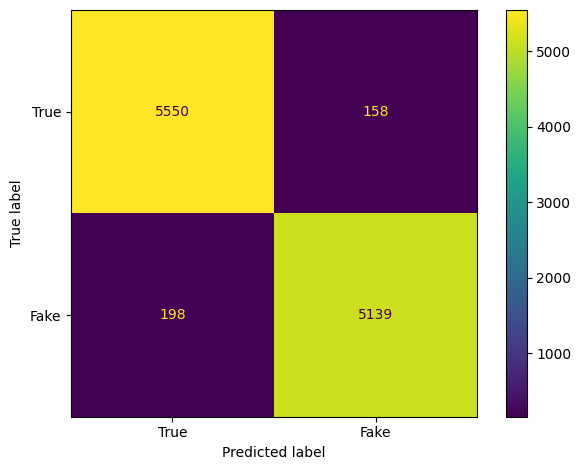

In [36]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix =cm, display_labels =['True', 'Fake'])
cm_display.plot()
plt.tight_layout()
plt.show()